<a href="https://colab.research.google.com/github/sanjithrana/credit-risk-probability/blob/main/Credit_risk_Probability_of_Default.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
test_data = pd.read_csv("/content/cs-test.csv.zip")
train_data = pd.read_csv("/content/cs-training.csv.zip")

In [ ]:
train_data.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [ ]:
test_data.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [ ]:
train_data.isnull().sum()

,0
Unnamed: 0,0
SeriousDlqin2yrs,0
RevolvingUtilizationOfUnsecuredLines,0
age,0
NumberOfTime30-59DaysPastDueNotWorse,0
DebtRatio,0
MonthlyIncome,29731
NumberOfOpenCreditLinesAndLoans,0
NumberOfTimes90DaysLate,0
NumberRealEstateLoansOrLines,0


In [ ]:
test_data.isnull().sum()

,0
Unnamed: 0,0
SeriousDlqin2yrs,101503
RevolvingUtilizationOfUnsecuredLines,0
age,0
NumberOfTime30-59DaysPastDueNotWorse,0
DebtRatio,0
MonthlyIncome,20103
NumberOfOpenCreditLinesAndLoans,0
NumberOfTimes90DaysLate,0
NumberRealEstateLoansOrLines,0


In [ ]:
test_data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
101498,False
101499,False
101500,False
101501,False


In [ ]:
train_data.shape , test_data.shape

((150000, 12), (101503, 12))

In [ ]:
def find_prec(df):
  return round(df.isnull().sum()/df.shape[0]*100,3)

In [ ]:
find_prec(train_data)

,0
Unnamed: 0,0.000
SeriousDlqin2yrs,0.000
RevolvingUtilizationOfUnsecuredLines,0.000
age,0.000
NumberOfTime30-59DaysPastDueNotWorse,0.000
DebtRatio,0.000
MonthlyIncome,19.821
NumberOfOpenCreditLinesAndLoans,0.000
NumberOfTimes90DaysLate,0.000
NumberRealEstateLoansOrLines,0.000


In [ ]:
find_prec(test_data)

,0
Unnamed: 0,0.000
SeriousDlqin2yrs,100.000
RevolvingUtilizationOfUnsecuredLines,0.000
age,0.000
NumberOfTime30-59DaysPastDueNotWorse,0.000
DebtRatio,0.000
MonthlyIncome,19.805
NumberOfOpenCreditLinesAndLoans,0.000
NumberOfTimes90DaysLate,0.000
NumberRealEstateLoansOrLines,0.000


In [ ]:
train_data[train_data.NumberOfDependents.isnull()].describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,3924.000000,3924.000000,3924.000000,3924.000000,3924.000000,3924.000000,0.0,3924.000000,3924.000000,3924.000000,3924.000000,0.0
mean,74510.281855,0.045617,10.745132,59.588940,0.908257,1083.812181,NaN,5.604230,0.834608,0.590979,0.812181,NaN
std,43703.084554,0.208679,237.699246,18.634168,8.679394,4186.731843,NaN,4.096353,8.679228,0.914455,8.678008,NaN
min,9.000000,0.000000,0.000000,21.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN
25%,36006.500000,0.000000,0.008474,48.000000,0.000000,21.000000,NaN,3.000000,0.000000,0.000000,0.000000,NaN
50%,74492.000000,0.000000,0.047458,61.000000,0.000000,358.000000,NaN,5.000000,0.000000,0.000000,0.000000,NaN
75%,112734.000000,0.000000,0.268155,74.000000,0.000000,1559.000000,NaN,8.000000,0.000000,1.000000,0.000000,NaN
max,149966.000000,1.000000,10821.000000,109.000000,98.000000,220516.000000,NaN,30.000000,98.000000,15.000000,98.000000,NaN


In [ ]:
train_data.NumberOfDependents.value_counts()

,count
NumberOfDependents,
0.0,86902
1.0,26316
2.0,19522
3.0,9483
4.0,2862
5.0,746
6.0,158
7.0,51
8.0,24


In [ ]:
fam_miss = train_data[train_data.NumberOfDependents.isnull()]
fam_nmiss = train_data[train_data.NumberOfDependents.notnull()]

In [ ]:
fam_nmiss.shape

(146076, 12)

In [ ]:
fam_miss.shape

(3924, 12)

In [ ]:
train_data.NumberOfDependents.agg(['mode'])

,mode
0,0.0


In [ ]:
train_data.NumberOfDependents = train_data.NumberOfDependents.fillna(0)

In [ ]:
find_prec(train_data)

,0
Unnamed: 0,0.000
SeriousDlqin2yrs,0.000
RevolvingUtilizationOfUnsecuredLines,0.000
age,0.000
NumberOfTime30-59DaysPastDueNotWorse,0.000
DebtRatio,0.000
MonthlyIncome,19.821
NumberOfOpenCreditLinesAndLoans,0.000
NumberOfTimes90DaysLate,0.000
NumberRealEstateLoansOrLines,0.000


In [ ]:
train_data['MonthlyIncome'].agg(['mean','min','median'])

,MonthlyIncome
mean,6670.221237
min,0.000000
median,5400.000000


In [ ]:
# Ensure 'MonthlyIncome' is numeric before calculating the median
train_data['MonthlyIncome'] = pd.to_numeric(train_data['MonthlyIncome'], errors='coerce')
median_monthly_income = train_data['MonthlyIncome'].median()
train_data['MonthlyIncome'] = train_data['MonthlyIncome'].fillna(median_monthly_income)

In [ ]:
find_prec(train_data)

,0
Unnamed: 0,0.0
SeriousDlqin2yrs,0.0
RevolvingUtilizationOfUnsecuredLines,0.0
age,0.0
NumberOfTime30-59DaysPastDueNotWorse,0.0
DebtRatio,0.0
MonthlyIncome,0.0
NumberOfOpenCreditLinesAndLoans,0.0
NumberOfTimes90DaysLate,0.0
NumberRealEstateLoansOrLines,0.0


In [ ]:
train_data.shape

(150000, 12)

In [ ]:
train_data.SeriousDlqin2yrs.value_counts()

,count
SeriousDlqin2yrs,
0,139974
1,10026


In [ ]:
train_data.SeriousDlqin2yrs.value_counts()/train_data.SeriousDlqin2yrs.shape[0]

,count
SeriousDlqin2yrs,
0,0.93316
1,0.06684


In [ ]:
train_data.RevolvingUtilizationOfUnsecuredLines.describe()

,RevolvingUtilizationOfUnsecuredLines
count,150000.000000
mean,6.048438
std,249.755371
min,0.000000
25%,0.029867
50%,0.154181
75%,0.559046
max,50708.000000


<Axes: ylabel='RevolvingUtilizationOfUnsecuredLines'>

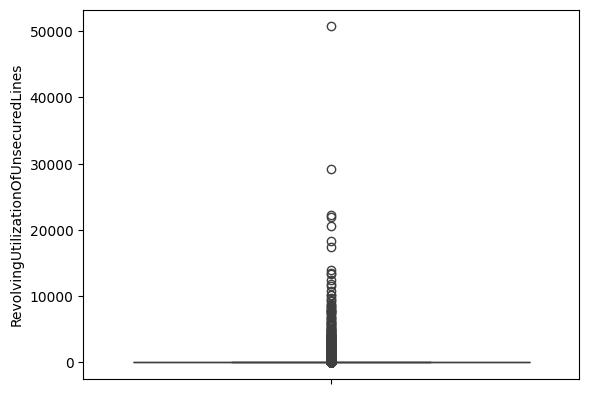

In [ ]:
sns.boxplot(train_data['RevolvingUtilizationOfUnsecuredLines'])

In [ ]:
train_data = train_data.drop(train_data[train_data['RevolvingUtilizationOfUnsecuredLines'] >10].index)

<Axes: ylabel='RevolvingUtilizationOfUnsecuredLines'>

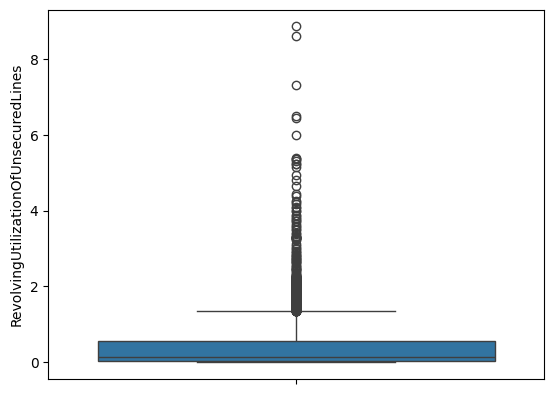

In [ ]:
sns.boxplot(train_data['RevolvingUtilizationOfUnsecuredLines'])

In [ ]:
train_data.shape

(149759, 12)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149759 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            149759 non-null  int64  
 1   SeriousDlqin2yrs                      149759 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  149759 non-null  float64
 3   age                                   149759 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  149759 non-null  int64  
 5   DebtRatio                             149759 non-null  float64
 6   MonthlyIncome                         149759 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       149759 non-null  int64  
 8   NumberOfTimes90DaysLate               149759 non-null  int64  
 9   NumberRealEstateLoansOrLines          149759 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  149759 non-null  int64  
 11  Numbe

<Axes: ylabel='age'>

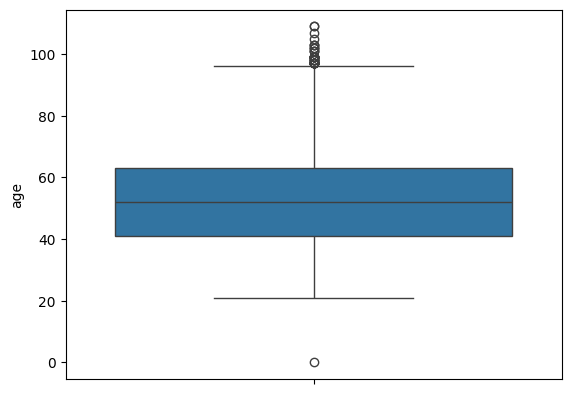

In [ ]:
sns.boxplot(train_data.age)

In [ ]:
train_data["age"]

,age
0,45
1,40
2,38
3,30
4,49
...,...
149995,74
149996,44
149997,58
149998,30


In [ ]:
train_data.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [ ]:
train_data['NumberOfTime30-59DaysPastDueNotWorse'].value_counts()

,count
NumberOfTime30-59DaysPastDueNotWorse,
0,125804
1,16020
2,4588
3,1750
4,747
5,342
98,264
6,140
7,54


In [ ]:
train_data.groupby(['NumberOfTime30-59DaysPastDueNotWorse']).size()

,0
NumberOfTime30-59DaysPastDueNotWorse,
0,125804
1,16020
2,4588
3,1750
4,747
5,342
6,140
7,54
8,25


In [ ]:
train_data['NumberOfTime60-89DaysPastDueNotWorse'].value_counts()

,count
NumberOfTime60-89DaysPastDueNotWorse,
0,142166
1,5723
2,1117
3,318
98,264
4,104
5,34
6,16
7,8


In [ ]:
train_data['NumberOfTimes90DaysLate'].value_counts()

,count
NumberOfTimes90DaysLate,
0,141429
1,5238
2,1554
3,666
4,291
98,264
5,131
6,80
7,38


In [ ]:
train_data[train_data['NumberOfTime30-59DaysPastDueNotWorse']>96].groupby(['SeriousDlqin2yrs']).size()

,0
SeriousDlqin2yrs,
0,121
1,143


<Axes: xlabel='DebtRatio', ylabel='Density'>

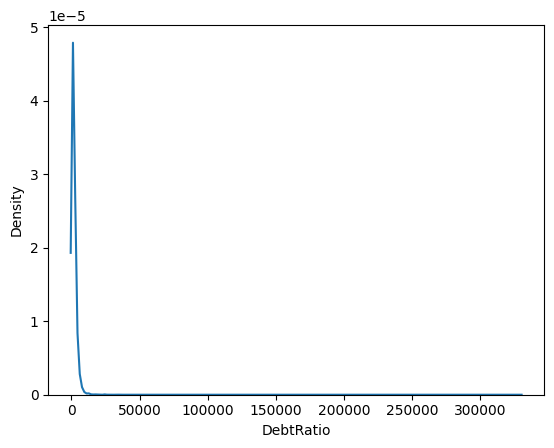

In [ ]:
sns.kdeplot(train_data.DebtRatio)

In [ ]:
train_data.DebtRatio.quantile([.975])

,DebtRatio
0.975,3487.05


In [ ]:
train_data[train_data['DebtRatio'] >3487][['SeriousDlqin2yrs','MonthlyIncome']].describe()

,SeriousDlqin2yrs,MonthlyIncome
count,3744.000000,3744.000000
mean,0.064370,5131.733974
std,0.245443,1173.465111
min,0.000000,0.000000
25%,0.000000,5400.000000
50%,0.000000,5400.000000
75%,0.000000,5400.000000
max,1.000000,5400.000000


In [ ]:

temp = train_data[(train_data['DebtRatio'] >3487) & (train_data['SeriousDlqin2yrs'] == train_data['MonthlyIncome'])]


In [ ]:
temp.groupby(['SeriousDlqin2yrs']).size()

,0
SeriousDlqin2yrs,
0,163
1,2


In [ ]:
temp = train_data[(train_data['DebtRatio'] >3487) & (train_data['SeriousDlqin2yrs'] == train_data['MonthlyIncome'])].index

In [ ]:
train =train_data.drop(temp)

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
model = XGBClassifier(tree_method = 'exact')

In [ ]:
x = train.drop(['SeriousDlqin2yrs'],axis=1)
y = train['SeriousDlqin2yrs']

In [ ]:
model.fit(x,y.values.ravel())

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = model.predict(x)

In [ ]:
accuracy_score(y,y_pred)

0.9474511009799859

In [ ]:
xm = confusion_matrix(y,y_pred)

<Axes: >

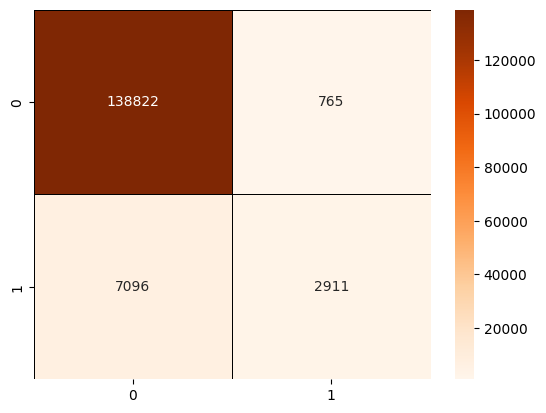

In [ ]:
sns.heatmap(xm,annot=True,fmt = 'd',cmap = 'Oranges',linewidths=0.5,linecolor='black')

In [ ]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97    139587
           1       0.79      0.29      0.43     10007

    accuracy                           0.95    149594
   macro avg       0.87      0.64      0.70    149594
weighted avg       0.94      0.95      0.94    149594

